In [1]:
import numpy
import pandas as pd
import utils
import lrp_vgg16
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
import torch
from PIL import Image
from matplotlib.colors import ListedColormap


In [2]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [3]:
directory = 'C:\d drive\design credit\pytorch implementation of heat mapping\image dataset'

def plot_pixel_distribution(img_file):
    img = plt.imread(img_file)
    fig = plt.figure(figsize=(16,8))
    fig.add_subplot(1,2,1)
    plt.title("image")
    plt.imshow(img)
    plt.xticks(numpy.array([]))
    plt.yticks(numpy.array([]))
    plt.show()


In [10]:
import random
heat_maps = []
for filename in random.sample(os.listdir(directory),100):
    if filename.endswith(".JPEG") or filename.endswith(".jpg"):
        #do smth
        #image = cv2.imread(filename)
        image = Image.open(os.path.join(directory,filename))
        #img_rsz = cv2.resize(image, (224,224))    #resizing according to input dimesion of vgg16
        img_rsz = image.resize((224,224))
        img = numpy.array(img_rsz)[...,::-1]/255.0
        map = lrp_vgg16.lrp_heatmap(img)
        heat_maps.append(map)
        #names_of_preds.append(name_of_pred)
        continue
    else:
        continue
#plot_image_grid(heat_maps[:16])


ValueError: axes don't match array

In [ ]:
len(heat_maps)

78

IndexError: list index out of range

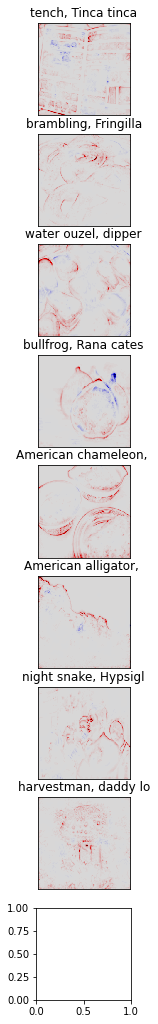

In [ ]:
fig = plt.figure(figsize=(20,20))
my_cmap = plt.cm.seismic(numpy.arange(plt.cm.seismic.N))
my_cmap[:,0:3] *= 0.85
my_cmap = ListedColormap(my_cmap)
for x in range(10):
    for y in range(10):
        ax = fig.add_subplot(10 ,10 ,10*y+x+1)
        b = 10*((numpy.abs(heat_maps[10*y+x])**3.0).mean()**(1.0/3))
        plt.title(utils.imgclasses[10*y+x][:20])
        plt.imshow(heat_maps[10*y+x],cmap=my_cmap,vmin=-b,vmax=b,interpolation='nearest')
        plt.xticks(numpy.array([]))
        plt.yticks(numpy.array([]))
plt.show()
